In [0]:
import urllib.request
stringInURL = "https://www.gutenberg.org/cache/epub/42324/pg42324.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/frank.txt")

Out[1]: ('/tmp/frank.txt', <http.client.HTTPMessage at 0x7f30ccf4ce80>)

In [0]:
dbutils.fs.mv("file:/tmp/frank.txt", "dbfs:/data/frank.txt")

Out[2]: True

In [0]:
FranksRawRDD= sc.textFile("dbfs:/data/frank.txt")

In [0]:
FranksMessyTokensRDD = FranksRawRDD.flatMap(lambda line: line.lower().strip().split(" "))

In [0]:
import re
FranksCleanTokensRDD = FranksMessyTokensRDD.map(lambda letter: re.sub(r'[^A-Za-z]', '', letter))

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
FranksWordsRDD = FranksCleanTokensRDD.filter(lambda PointLessW: PointLessW not in stopwords)

In [0]:
FranksEmptyRemoveRDD = FranksWordsRDD.filter(lambda x: x != "")

In [0]:
IKVPairsRDD = FranksEmptyRemoveRDD.map(lambda word: (word,1))

In [0]:
FranksWordCountRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc + value)

In [0]:
FranksResults = FranksWordCountRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(FranksResults)

[(227, 'one'), (154, 'yet'), (137, 'upon'), (132, 'man'), (124, 'life'), (122, 'every'), (116, 'may'), (113, 'father'), (113, 'first'), (111, 'shall')]

Out[11]:

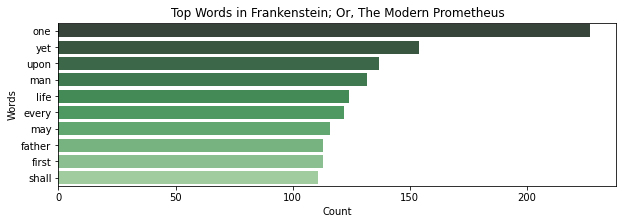

Text(0.5, 1.0, 'Top Words in Frankenstein; Or, The Modern Prometheus')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source = 'Frankenstein; Or, The Modern Prometheus'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

df = pd.DataFrame.from_records(FranksResults, columns =[xlabel, ylabel]) 
plt.figure(figsize=(10,3))
sns.barplot(xlabel, ylabel, data=df, palette="Greens_d").set_title(title)